In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Load the dataset
data_url = 'https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv'
df = pd.read_csv(data_url)




In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Close
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500
...,...,...
12486,2022-03-02,136.160004
12487,2022-03-03,139.289993
12488,2022-03-04,142.820007
12489,2022-03-07,141.669998


In [3]:
start_date =  pd.to_datetime('2010-01-01')
end_date =  pd.to_datetime('2022-12-31')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]



In [4]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the dataset
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.3)
# validate_size = len(df) - train_size - test_size

train_data = df[:train_size]['Close']
test_data = df[train_size:train_size+test_size]['Close']
# validate_data = df[train_size+test_size:]['Close']


In [5]:
train_data

0       54.230000
1       53.689999
2       53.570000
3       53.599998
4       53.330002
          ...    
2141    84.510002
2142    85.930000
2143    87.209999
2144    86.529999
2145    86.519997
Name: Close, Length: 2146, dtype: float64

In [6]:
test_data

2146     87.699997
2147     87.639999
2148     88.190002
2149     88.070000
2150     87.720001
           ...    
3060    135.990005
3061    136.160004
3062    139.289993
3063    142.820007
3064    141.669998
Name: Close, Length: 919, dtype: float64

In [7]:
# Build the Holt-Winters model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=5)
model_fit = model.fit()

# Predict for the test and validate sets
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate RMSE for test and validate sets
test_rmse = np.sqrt(mean_squared_error(test_data, test_predictions))


# Calculate the Mean Absolute Percentage Error (MAPE)
test_mape = np.mean(np.abs((test_data - test_predictions) / test_data) * 100)

# Mean Absolute Error (MAE)
test_mae = mean_absolute_error(test_data, test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)
print("Test MAE:", test_mae)

Test RMSE: 33.279774824057995
Test MAPE: 22.657921760085227
Test MAE: 29.63169178254944


In [8]:
# Bonus 30 index
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+32, step=1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(last_index+1, last_index+31)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
3066    100.365928
3067    100.367514
3068    100.449172
3069    100.445796
3070    100.458712
3071    100.441262
3072    100.442848
3073    100.524507
3074    100.521131
3075    100.534046
3076    100.516597
3077    100.518182
3078    100.599841
3079    100.596465
3080    100.609380
3081    100.591931
3082    100.593517
3083    100.675175
3084    100.671799
3085    100.684715
3086    100.667265
3087    100.668851
3088    100.750510
3089    100.747134
3090    100.760049
3091    100.742600
3092    100.744185
3093    100.825844
3094    100.822468
3095    100.835383
3096    100.817934
dtype: float64


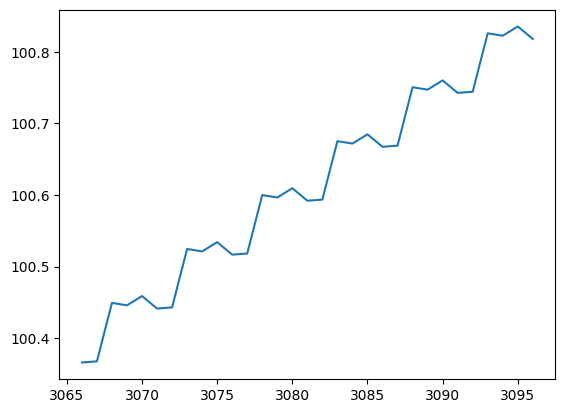

In [9]:
plt.plot(last_data, y_next_30_days)

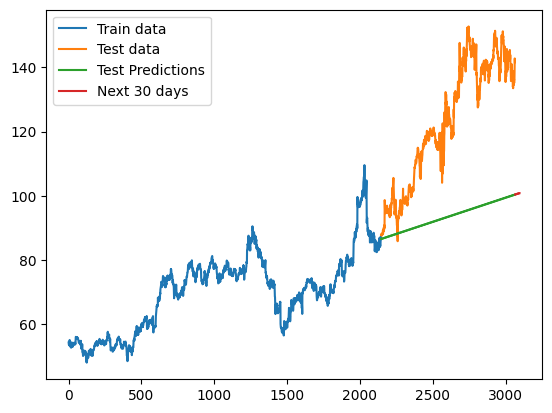

In [10]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
# plt.plot(validate_data.index, validate_data)
plt.plot(test_data.index, test_predictions)
# plt.plot(validate_data.index, validate_predictions)
plt.plot(last_data, y_next_30_days)
plt.legend(['Train data', 'Test data', 'Test Predictions','Next 30 days'])
plt.show()